In [1]:
import pickle
pkl_file = open('data.pkl', 'rb')
data = pickle.load(pkl_file)
pkl_file.close()
train_val_data=data['train_data']
train_val_label=data['train_label']
test_data=data['test_data']
output_txt=data['output_txt']
print train_val_data.shape,train_val_label.shape,test_data.shape,output_txt

(7049, 9216) (7049, 30) (1783, 9216) ['left_eye_center_x' 'left_eye_center_y' 'right_eye_center_x'
 'right_eye_center_y' 'left_eye_inner_corner_x' 'left_eye_inner_corner_y'
 'left_eye_outer_corner_x' 'left_eye_outer_corner_y'
 'right_eye_inner_corner_x' 'right_eye_inner_corner_y'
 'right_eye_outer_corner_x' 'right_eye_outer_corner_y'
 'left_eyebrow_inner_end_x' 'left_eyebrow_inner_end_y'
 'left_eyebrow_outer_end_x' 'left_eyebrow_outer_end_y'
 'right_eyebrow_inner_end_x' 'right_eyebrow_inner_end_y'
 'right_eyebrow_outer_end_x' 'right_eyebrow_outer_end_y' 'nose_tip_x'
 'nose_tip_y' 'mouth_left_corner_x' 'mouth_left_corner_y'
 'mouth_right_corner_x' 'mouth_right_corner_y' 'mouth_center_top_lip_x'
 'mouth_center_top_lip_y' 'mouth_center_bottom_lip_x'
 'mouth_center_bottom_lip_y']


In [4]:
import numpy as np
import scipy.misc
from pylab import *
%matplotlib inline

In [3]:
ratio=227./96
train_val_label_resized=train_val_label*ratio
N_train=train_val_label.shape[0]
train_val_data_resized=np.zeros((N_train,227*227*3),dtype='uint8')
for i in range(N_train):
    origin_image=train_val_data[i].reshape((96,96))
    resized_image=scipy.misc.imresize(origin_image,(227,227), interp='bilinear')
    color_image=np.tile(resized_image,(3,1,1))
    train_val_data_resized[i,:]=color_image.flatten()
del train_val_label,train_val_label

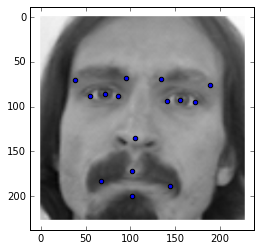

In [5]:
plt.imshow(train_val_data_resized[0].reshape((3,227,227)).transpose((1,2,0)))   
plt.scatter(x=train_val_label_resized[0][::2], y=train_val_label_resized[0][1::2])
plt.show()

In [6]:
from sklearn.cross_validation import train_test_split
train_data, val_data, train_label, val_label = train_test_split(train_val_data_resized, train_val_label_resized, test_size=0.2837, random_state=42)
print train_data.shape,train_label.shape,val_data.shape,val_label.shape

(5049, 154587) (5049, 30) (2000, 154587) (2000, 30)


In [ ]:
origin_image=train_data[0].reshape((96,96))
gray_image=scipy.misc.imresize(origin_image,(227,227), interp='bilinear')
color_image=np.tile(gray_image,(3,1,1))
color_image[0]

In [ ]:
import PIL
from PIL import Image

basewidth = 300
img = Image.open('somepic.jpg')
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), PIL.Image.ANTIALIAS)
img.save('sompic.jpg')

In [ ]:
N = train_data.shape[0]
map_size = (train_data.nbytes+train_label.nbytes) * 10
env = lmdb.open('train_lmdb', map_size=map_size)
with env.begin(write=True) as txn:
    # txn is a Transaction object
    for i in range(N):
        datum = caffe.proto.caffe_pb2.Datum()
        datum.channels = 1
        datum.height = 28
        datum.width = 28
        datum.data = label_data_train[i,1:].tobytes()  # or .tostring() if numpy < 1.9
        datum.label = int(label_data_train[i,0])
        str_id = '{:08}'.format(i)
        txn.put(str_id, datum.SerializeToString())
        
        
N = label_data_val.shape[0]
map_size = label_data_val.nbytes * 10
env = lmdb.open('val_lmdb', map_size=map_size)
with env.begin(write=True) as txn:
    # txn is a Transaction object
    for i in range(N):
        datum = caffe.proto.caffe_pb2.Datum()
        datum.channels = 1
        datum.height = 28
        datum.width = 28
        datum.data = label_data_train[i,1:].tobytes()  # or .tostring() if numpy < 1.9
        datum.label = int(label_data_train[i,0])
        str_id = '{:08}'.format(i)
        txn.put(str_id, datum.SerializeToString())
        
        
N = data_test.shape[0]
map_size = data_test.nbytes * 10        
env = lmdb.open('test_lmdb', map_size=map_size)
with env.begin(write=True) as txn:
    # txn is a Transaction object
    for i in range(N):
        datum = caffe.proto.caffe_pb2.Datum()
        datum.channels = 1
        datum.height = 28
        datum.width = 28
        datum.data = data_test[i].tobytes()  # or .tostring() if numpy < 1.9
        str_id = '{:08}'.format(i)
        txn.put(str_id, datum.SerializeToString())